# Exploring Python with the titanic dataset

In this notebook we are going to explore the titanic dataset again, but this time using Python. Be sure to go through the R notebook before running this one.

Jupyter notebook also has a markdown syntax. This is what I am using to write these instructions for you. You can find more about it [here](https://www.datacamp.com/community/tutorials/markdown-in-jupyter-notebook).

## Overview

In this exercise we will perform.

<ol>
    <li> Download the dataset and parse it so we can begin manipulating it in Python </li>
    <li> Perform some basic data cleaning </li>
    <li> Explore the data using visualisations </li>
</ol>    

This notebook is also intended to act as a guide, so don't worry if you can't understand everything. Most importantly, I would like you to compare both notebooks (R and Python), have some overview of how both languages work when handling data, and start familiarising yourself with these two options.

## Preliminaries

Similarly to R, we need to import the necessary Python modules for this exercise. Run the cell below and if there is no output it means you have all the modules installed and loaded with success. If you are missing any module you can install them using pip with the commands below.

`pip install pandas
 pip install matplotlib
 pip install numpy
`

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

Now we need to load the titanic dataset and display some information to be sure the dataset has been loaded and it looks like how it should. For this we are going to use [pandas](https://pandas.pydata.org/docs/). This python module allows us to create data frames, similarly to the data frames in R. Once it has been loaded we can check how it looks like using the *head* method.

In [2]:
url="https://web.stanford.edu/class/archive/cs/cs109/cs109.1166/stuff/titanic.csv"
#url="https://osf.io/aupb4/download"
# pd refers to the pandas module we have imported. It is common to use this alias when using pandas.
# You will probably see other examples using pd when studying pandas.
df = pd.read_csv(url)
df.head()

,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
0,0,3,Mr. Owen Harris Braund,male,22.0,1,0,7.2500
1,1,1,Mrs. John Bradley (Florence Briggs Thayer) Cum...,female,38.0,1,0,71.2833
2,1,3,Miss. Laina Heikkinen,female,26.0,0,0,7.9250
3,1,1,Mrs. Jacques Heath (Lily May Peel) Futrelle,female,35.0,1,0,53.1000
4,0,3,Mr. William Henry Allen,male,35.0,0,0,8.0500


## Cleaning data

First step here is to have a summary of the data which can give us a nice overview of the dataset. It helps us to see if everything has been imported correctly and makes sense. For that, we are using the `describe` method from the `pandas` module. See what are the differences between the *summary* method in R. Check what happens if you remove the `include="all"` parameter.

In [7]:
df.describe(include="all")

,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
count,887.000000,887.000000,887,887,887.000000,887.000000,887.000000,887.00000
unique,NaN,NaN,887,2,NaN,NaN,NaN,NaN
top,NaN,NaN,Mr. Owen Harris Braund,male,NaN,NaN,NaN,NaN
freq,NaN,NaN,1,573,NaN,NaN,NaN,NaN
mean,0.385569,2.305524,NaN,NaN,29.471443,0.525366,0.383315,32.30542
std,0.487004,0.836662,NaN,NaN,14.121908,1.104669,0.807466,49.78204
min,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,0.00000
25%,0.000000,2.000000,NaN,NaN,20.250000,0.000000,0.000000,7.92500
50%,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,14.45420
75%,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,31.13750


You have probably noticed that we have the same problems when reporting statistics about the *Survived* and *Age* features. We are going to deal with them the same way we did in R, but in the Python way.

For the *Survived* feature it makes more sense if this is a logical feature. In Pandas we have the boolean type to represent that. So we are going to convert it to `bool` using the `astype` method of the pandas dataframe. `iloc` is a method that is used to return a slice of the dataframe. In this case we want all the rows and first column only. This is what the `df.iloc[:,0]` slice returns. Try to run this individually in another cell and see what you get. You can also play with the index values and see what happens. If you want to know even more check the pandas documentation linked [here](https://pandas.pydata.org/docs/index.html).

In summary, the cell below is getting the first column of the data frame, converting it to a boolean type and assigning the result to the same first column. You should notice the difference after running the `describe` method again.

In [9]:
df.iloc[:,0] = df.iloc[:,0].astype(bool)
df.describe(include="all")

,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
count,887,887.000000,887,887,887.000000,887.000000,887.000000,887.00000
unique,2,NaN,887,2,NaN,NaN,NaN,NaN
top,False,NaN,Mr. Owen Harris Braund,male,NaN,NaN,NaN,NaN
freq,545,NaN,1,573,NaN,NaN,NaN,NaN
mean,NaN,2.305524,NaN,NaN,29.471443,0.525366,0.383315,32.30542
std,NaN,0.836662,NaN,NaN,14.121908,1.104669,0.807466,49.78204
min,NaN,1.000000,NaN,NaN,0.420000,0.000000,0.000000,0.00000
25%,NaN,2.000000,NaN,NaN,20.250000,0.000000,0.000000,7.92500
50%,NaN,3.000000,NaN,NaN,28.000000,0.000000,0.000000,14.45420
75%,NaN,3.000000,NaN,NaN,38.000000,1.000000,0.000000,31.13750


Similarly, we would like the type of the *Age* feature to be `integer`, without the decimal points. In Pandas we can use the `int64` type, which means an integer with 64 bit. Once we convert *Age* to integer, we should not have the decimals points in this column anymore. Note how the cell below uses a different syntax when selecting the *Age* column. What might be some advantages and disadvantages of using this syntax instead of that one above?

In [10]:
df["Age"] = df["Age"].astype('int64')
df.describe(include="all")

,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
count,887,887.000000,887,887,887.000000,887.000000,887.000000,887.00000
unique,2,NaN,887,2,NaN,NaN,NaN,NaN
top,False,NaN,Mr. Owen Harris Braund,male,NaN,NaN,NaN,NaN
freq,545,NaN,1,573,NaN,NaN,NaN,NaN
mean,NaN,2.305524,NaN,NaN,29.455468,0.525366,0.383315,32.30542
std,NaN,0.836662,NaN,NaN,14.129919,1.104669,0.807466,49.78204
min,NaN,1.000000,NaN,NaN,0.000000,0.000000,0.000000,0.00000
25%,NaN,2.000000,NaN,NaN,20.000000,0.000000,0.000000,7.92500
50%,NaN,3.000000,NaN,NaN,28.000000,0.000000,0.000000,14.45420
75%,NaN,3.000000,NaN,NaN,38.000000,1.000000,0.000000,31.13750


## Visualising the data

This should be enough cleaning for now so we can start creating our visualizations. We will try to plot the same graphs made in the R notebook but there might be some slight differences due to how the two languages work.

First, we will plot an histogram of *Age* separated by *Sex*. For that we will need to use the `pivot` method to get only the data we are interested in plotting, or in this case the *Age* feature separated by females and males. Try to run the first part
of the statement below `df.pivot(columns="Sex", values="Age")` in a different cell and see what you get.

After that, we are using the `plot` method of the Pandas module. This is very useful to plot quick graphs without too much customization, contrary to what the `matplotlib` module offers for example. We will use this for now and see other examples with `matplotlib` below.

Compare again with the R notebook, which one do you think is easier to use? Is there some visualisation better than the other?

<AxesSubplot:ylabel='Frequency'>

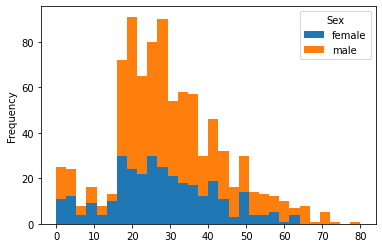

In [11]:
df.pivot(columns="Sex", values="Age").plot.hist(bins=30, stacked=True)

As with the previous R notebook, it would be interesting to plot this histogram with different binwidths, this might give us a better insight on the data distribution. In Python we can do that by passing the number of bins or a sequence representing the bin edges. In this example we are going to use the sequence option.

To generate a sequence we are going to use the `range` function from the built-in Python functions. Its header is defined as `range(start, stop, step)`, so given a start and stop values it creates all the numbers in the sequence between them with step `step`. For example `range(0, 12, 2)` will generate the sequence `0, 2, 4, 6, 8, 10` (the last value is not included). You can see more about range [here](https://www.w3schools.com/python/ref_func_range.asp).

So, in order to use range to generate the sequence of bins edge, we are going to create a sequence that goes from min *Age* until max *Age* with step equals to the binwidth we want. Check the code below. It uses a **for** loop to generate sequences of bin edges with different steps. Compare the results against R another time and see what are the differences and what do you prefer. 

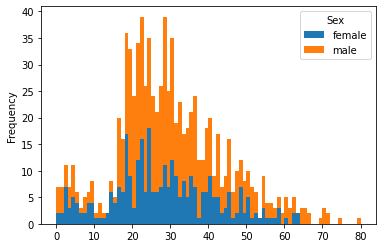

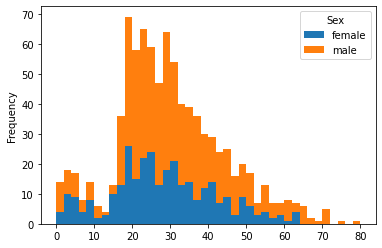

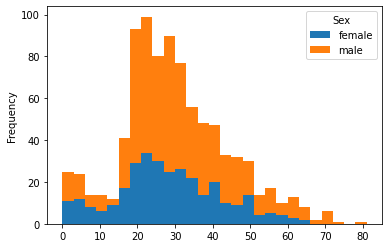

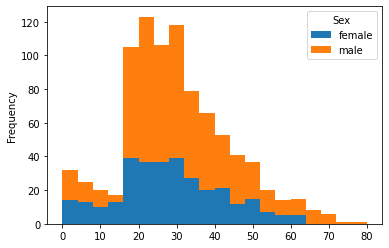

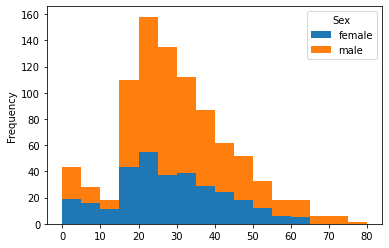

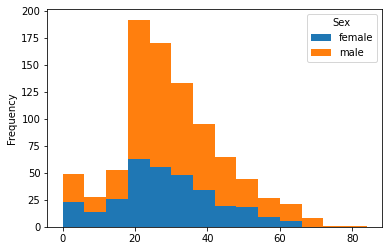

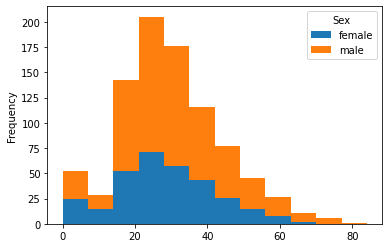

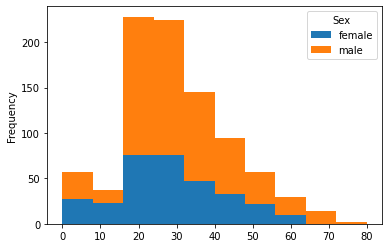

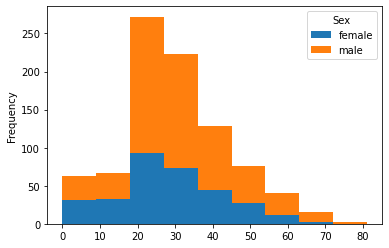

In [12]:
for binwidth in range(1,10):
    df.pivot(columns="Sex", values="Age").plot.hist(bins=range(int(min(df["Age"])), int(max(df["Age"])) + binwidth, binwidth), stacked=True)

## Bar charts and matplotlib

This time we are going to plot bar charts to explore possible interesting relationships between the data's features. Again, we are going to investigate how the *Sex* feature interacts with the *Survived* feature.

This time we are going to create a figure object with `matplotlib`. You can see the documentation [here](https://matplotlib.org/stable/contents.html). This figure object is interesting because we can use many of the different methods for figure in the matplotlib module one at a time. For example, first we add the axes to the figure, then we add one bar, then the legend, etc. It offers a lot of customisation, allowing us to define how the graph will look in detail.

Run the cell below and check how the final graph looks. Read the comments and change the arguments for each method and see how they work. Note that the code for this part in R was much shorter, but we wouldn't know how to customise as much as in the example below.

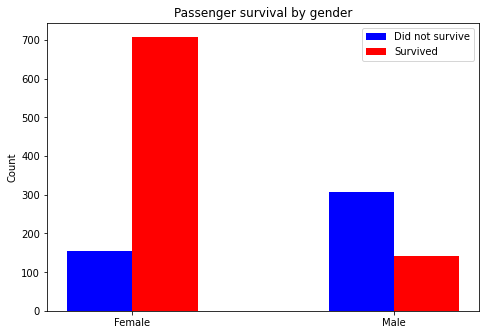

In [15]:
# plt refers to the `matplotlib.pyplot` module that
# we imported in the first cell. Here we are creating a figure
# with the figure method.
fig = plt.figure()

# Add axes with the add_axes method to the figure object.
# This defines the dimensions [left, bottom, width, height] of the
# new axes as fractions of figure width and height. It does not
# define the actual size of the figure. Here, left and bottom are at (0,0)
# and width and height have proportion 1 to the figure size, so it is a square.
# Try changing the third value to 0.5 and see what happens.
ax = fig.add_axes([0,0,1,1])

# First, we filter the data according to the criteria we want, i.e. male and survived.
# To filter, we are applying some conditionals to the Pandas dataframe.
female_died = df[(df.Sex == "female") & (df.Survived == False)]
female_survived = df[(df.Sex == "female") & (df.Survived == True)]
male_died = df[(df.Sex == "male") & (df.Survived == False)]
male_survived = df[(df.Sex == "male") & (df.Survived == True)]

# To count, we are using the `len` (short for length) method of Python.
# The code below starts by adding two bars to the axes using the bar method and 
# associating to each bar the data we want to plot.
# It follows then by adding the legend, title, y label, x ticks, and x ticklabes. 
# Finally, once we have defined everything we are calling `plt.show` to plot the graph.
# Try to investigate the code below and see what it does. 
# Perhaps run some smaller parts in different cells and see how they work.
ax.bar([0, 1], [len(female_died), len(female_survived)], color = 'b', width = 0.25,)
ax.bar([0.25, 1.25], [len(male_died), len(male_survived)], color = 'r', width = 0.25,)
ax.legend(labels=['Did not survive', 'Survived'])
ax.set_title('Passenger survival by gender')
ax.set_ylabel('Count')
ax.set_xticks([0.125, 1.125])
ax.set_xticklabels(["Female", "Male"])
plt.show()

In the next graph we want a similar look to the one above, but this time, instead of plotting the ratio of survived/dead by gender, we are going to plot it by age, those who were younger than 16 (children) and those older (adults). The process is the same as above, but we are going to filter our data according to this new criteria. You can see the code and result after running the cell below.

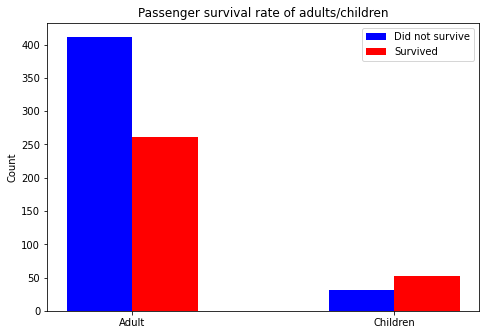

In [16]:
X = np.arange(2)
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])

died = [len(df[(df.Age > 16) & (df.Survived == False)]),  len(df[(df.Age <= 16) & (df.Survived == False)])]
survived = [len(df[(df.Age > 16) & (df.Survived == True)]),  len(df[(df.Age <= 16) & (df.Survived == True)])]

ax.bar(X + 0.00, died, color = 'b', width = 0.25,)
ax.bar(X + 0.25, survived, color = 'r', width = 0.25,)
ax.legend(labels=['Did not survive', 'Survived'])
ax.set_title('Passenger survival rate of adults/children')
ax.set_ylabel('Count')
ax.set_xticks(X + 0.125)
ax.set_xticklabels(["Adult", "Children"])
plt.show()

## Faceting

Finally, to conclude our Titanic exploration with Python we would like to use facets, the same way we did in R. For that, we will filter the data similarly the same way we did for the barcharts above and then plot the respective histogram. However, we are going to use the `subplot` method of `matplotlib` that allows us to plot multiple graphs in a single figure. To filter the data according to the combination of features we are interested in, we are running two nested loops that will iterate over the values of *sex* and *pclass*. Note that this time we are actually defining the figure sizes before plotting them. See what happens if you remove this definition. 

ValueError: min() arg is an empty sequence

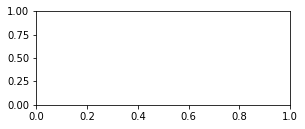

In [28]:
sex = ["female", "male"]
pclass = [1, 2, 3]
index = 1
nrows = 5
ncolumns = 2

plt.figure(figsize=(10, 10))

for p in pclass:
    for s in sex:        
        plt.subplot(nrows, ncolumns, index)
        
        data = df[(df.Sex == s) & (df.PClass == p) & (df.Survived == False)].Age.values
        plt.hist(data, bins=range(min(data), max(data) + 5, 5))
        
        data = df[(df.Sex == s) & (df.PClass == p) & (df.Survived == True)].Age.values
        
        plt.hist(data, bins=range(min(data), max(data) + 5, 5))
        
        
        plt.legend(labels=['Did not survive', 'Survived'])
        plt.title(s + " " + str(p) + " class")
        plt.xlabel("Age")
        plt.ylabel("Count")
        index += 1

plt.tight_layout()
plt.show()


## Conclusion

Well done if you read everything and reached this point. I hope that you have a better understanding of how Python and R works and that you were able to do a small comparison between them with these two notebooks. I also hope you will be able to do something similar once we have studied all the topics related to these notebooks (importing data, data cleaning, data manipulation, data visualisation, etc.).